In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
# Matplotlib ayarları
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(font_scale=1.2)

In [ ]:
df = pd.read_csv('ant.csv', encoding='ISO-8859-1')

In [8]:
print("Veri setinin boyutu:", df.shape)
df.head()

Veri setinin boyutu: (227, 51)

İlk 5 satır:


,casent,new codes for PTs,species,CL,PoOC,CW,CWb,FRS,SL,EL,...,SPTI/CS,ML/CS,PEL/CS,NOL/CS,MPST/CS,PEH/CS,NOH/CS,PPH/CS,SPST/CS,PPL/CS
0,CASENT_0077416,NaN,excelsior,830,380,702,650,208,582,178,...,0.243243,1.364865,0.527027,0.364865,0.418919,0.300000,0.178378,0.294595,0.270270,0.267568
1,CASENT_0077416,NaN,excelsior,820,382,710,660,210,582,172,...,0.297297,1.371622,0.547297,0.371622,0.425676,0.313514,0.186486,0.294595,0.286486,0.270270
2,CASENT_0077417,NaN,excelsior,830,388,700,652,210,588,170,...,0.310391,1.363023,0.533063,0.350877,0.404858,0.294197,0.182186,0.294197,0.283401,0.245614
3,CASENT_0077417,NaN,excelsior,830,372,695,640,215,602,172,...,0.292517,1.360544,0.533333,0.367347,0.435374,0.285714,0.170068,0.282993,0.302041,0.251701
4,CASENT_0077418,NaN,excelsior,762,340,640,585,198,552,155,...,0.274684,1.380846,0.534521,0.356347,0.423163,0.296956,0.178174,0.279139,0.282108,0.259837


In [9]:
print("\nVeri setindeki sütunlar:")
df.columns.tolist()


Veri setindeki sütunlar:


['casent',
 'new codes for PTs',
 'species',
 'CL',
 'PoOC',
 'CW',
 'CWb',
 'FRS',
 'SL',
 'EL',
 'MW',
 'PSTI',
 'PEW',
 'PPW',
 'SPBA',
 'SPTI',
 'ML',
 'PEL',
 'NOL',
 'MPST',
 'PEH',
 'NOH',
 'PPH',
 'SPST',
 'PPL',
 'dendroname',
 'lat',
 'long',
 'Unnamed: 28',
 'CS (µm)',
 'PoOC/CL',
 'CL/CW',
 'CL/CWb',
 'FRS/CS',
 'SL/CS',
 'EL/CS',
 'MW/CS',
 'PSTI/CS',
 'PEW/CS',
 'PPW/CS',
 'SPBA/CS',
 'SPTI/CS',
 'ML/CS',
 'PEL/CS',
 'NOL/CS',
 'MPST/CS',
 'PEH/CS',
 'NOH/CS',
 'PPH/CS',
 'SPST/CS',
 'PPL/CS']

In [10]:
print("\nBoş değerlerin sayısı:")
df.isnull().sum()


Boş değerlerin sayısı:


casent                 0
new codes for PTs    221
species                0
CL                     0
PoOC                   0
CW                     0
CWb                    0
FRS                    0
SL                     0
EL                     0
MW                     0
PSTI                   0
PEW                    0
PPW                    0
SPBA                   0
SPTI                   0
ML                     0
PEL                    0
NOL                    0
MPST                   0
PEH                    0
NOH                    0
PPH                    0
SPST                   0
PPL                    0
dendroname             0
lat                    0
long                   0
Unnamed: 28          227
CS (µm)                0
PoOC/CL                0
CL/CW                  0
CL/CWb                 0
FRS/CS                 0
SL/CS                  0
EL/CS                  0
MW/CS                  0
PSTI/CS                0
PEW/CS                 0
PPW/CS                 0


In [14]:
# Gereksiz sütunları kaldıralım ve veri tiplerini düzenleyelim
# "new codes for PTs" ve "" gibi boş veya gereksiz sütunları kaldıralım
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(columns=['new codes for PTs', "Unnamed: 28"])

In [15]:
print("\nTemizlenmiş veri setinde boş değerlerin sayısı:")
df_cleaned.isnull().sum()


Temizlenmiş veri setinde boş değerlerin sayısı:


casent        0
species       0
CL            0
PoOC          0
CW            0
CWb           0
FRS           0
SL            0
EL            0
MW            0
PSTI          0
PEW           0
PPW           0
SPBA          0
SPTI          0
ML            0
PEL           0
NOL           0
MPST          0
PEH           0
NOH           0
PPH           0
SPST          0
PPL           0
dendroname    0
lat           0
long          0
CS (µm)       0
PoOC/CL       0
CL/CW         0
CL/CWb        0
FRS/CS        0
SL/CS         0
EL/CS         0
MW/CS         0
PSTI/CS       0
PEW/CS        0
PPW/CS        0
SPBA/CS       0
SPTI/CS       0
ML/CS         0
PEL/CS        0
NOL/CS        0
MPST/CS       0
PEH/CS        0
NOH/CS        0
PPH/CS        0
SPST/CS       0
PPL/CS        0
dtype: int64

In [16]:
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('�', 'u')

In [17]:
print("\nVeri tipleri:")
df_cleaned.dtypes


Veri tipleri:


casent         object
species        object
CL              int64
PoOC            int64
CW              int64
CWb             int64
FRS             int64
SL              int64
EL              int64
MW              int64
PSTI            int64
PEW             int64
PPW             int64
SPBA            int64
SPTI            int64
ML              int64
PEL             int64
NOL             int64
MPST            int64
PEH             int64
NOH             int64
PPH             int64
SPST            int64
PPL             int64
dendroname     object
lat           float64
long          float64
CS_µm         float64
PoOC/CL       float64
CL/CW         float64
CL/CWb        float64
FRS/CS        float64
SL/CS         float64
EL/CS         float64
MW/CS         float64
PSTI/CS       float64
PEW/CS        float64
PPW/CS        float64
SPBA/CS       float64
SPTI/CS       float64
ML/CS         float64
PEL/CS        float64
NOL/CS        float64
MPST/CS       float64
PEH/CS        float64
NOH/CS    

In [18]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nSayısal sütun sayısı: {len(numeric_cols)}")


Sayısal sütun sayısı: 46


In [19]:
print("\nTemel istatistikler:")
df_cleaned[numeric_cols].describe()


Temel istatistikler:


,CL,PoOC,CW,CWb,FRS,SL,EL,MW,PSTI,PEW,...,SPTI/CS,ML/CS,PEL/CS,NOL/CS,MPST/CS,PEH/CS,NOH/CS,PPH/CS,SPST/CS,PPL/CS
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,...,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,818.885463,378.048458,731.519824,675.867841,222.823789,605.484581,173.048458,489.669604,489.242291,179.933921,...,0.272360,1.368790,0.522451,0.352134,0.417992,0.303608,0.173749,0.273410,0.297611,0.245898
std,75.774322,45.471885,84.403180,68.798476,19.348796,64.561239,13.682310,55.411582,56.910723,27.108926,...,0.033104,0.043606,0.024475,0.023881,0.013154,0.014041,0.012491,0.015152,0.057418,0.014954
min,502.000000,230.000000,465.000000,442.000000,150.000000,340.000000,112.000000,300.000000,290.000000,105.000000,...,0.190896,1.228814,0.423729,0.253807,0.371747,0.270636,0.121569,0.239437,0.219355,0.199715
25%,780.000000,350.000000,680.000000,636.500000,210.000000,579.000000,168.000000,452.000000,450.000000,162.000000,...,0.247590,1.344593,0.508309,0.339475,0.409889,0.294019,0.167017,0.263440,0.259419,0.235294
50%,830.000000,382.000000,712.000000,665.000000,225.000000,602.000000,172.000000,490.000000,492.000000,180.000000,...,0.271041,1.371622,0.524968,0.353741,0.418605,0.302425,0.174731,0.270458,0.280095,0.245487
75%,870.000000,410.000000,790.000000,722.000000,235.000000,640.000000,182.000000,525.000000,530.000000,195.000000,...,0.294872,1.401416,0.537517,0.365888,0.425930,0.313399,0.181818,0.279814,0.308522,0.255168
max,960.000000,485.000000,950.000000,890.000000,268.000000,748.000000,215.000000,610.000000,605.000000,255.000000,...,0.349697,1.459649,0.575758,0.409722,0.452196,0.346253,0.204878,0.314645,0.458660,0.292414


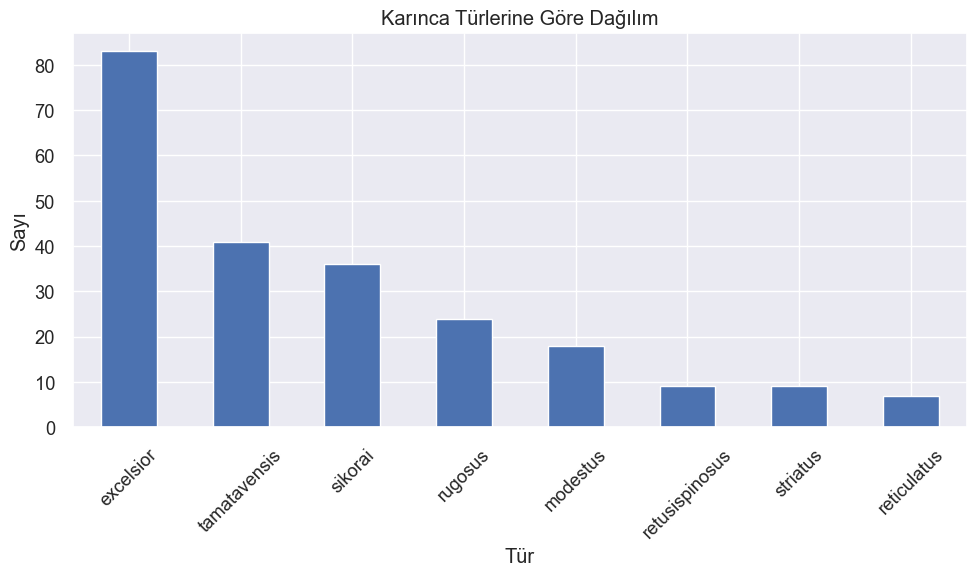

In [20]:
plt.figure(figsize=(10, 6))
species_counts = df_cleaned['species'].value_counts()
species_counts.plot(kind='bar')
plt.title('Karınca Türlerine Göre Dağılım')
plt.xlabel('Tür')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

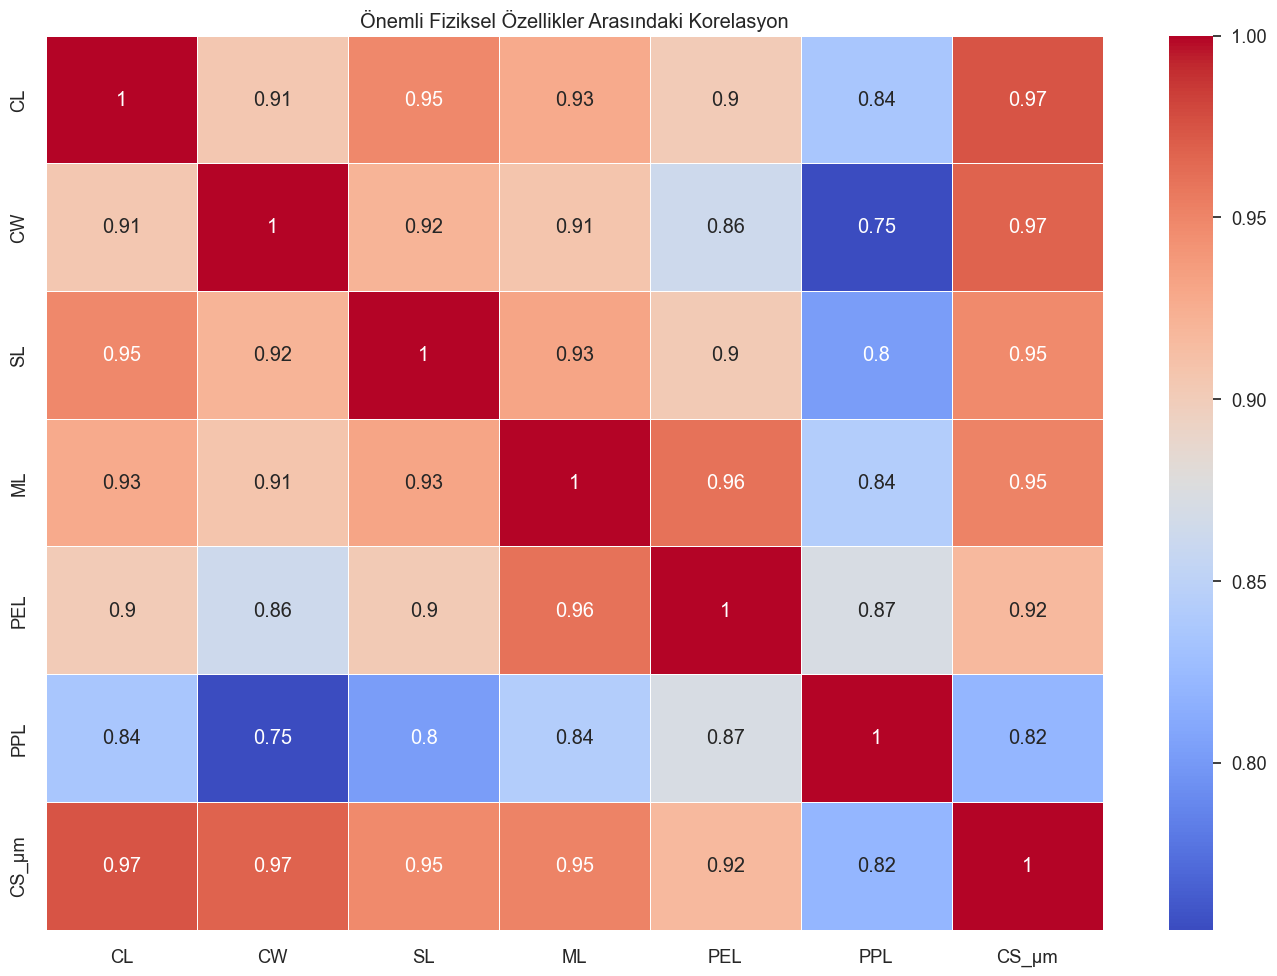

In [ ]:
plt.figure(figsize=(14, 10))
important_features = ['CL', 'CW', 'SL', 'ML', 'PEL', 'PPL', 'CS_µm']
correlation_matrix = df_cleaned[important_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Önemli Fiziksel Özellikler Arasındaki Korelasyon')
plt.tight_layout()
plt.show()

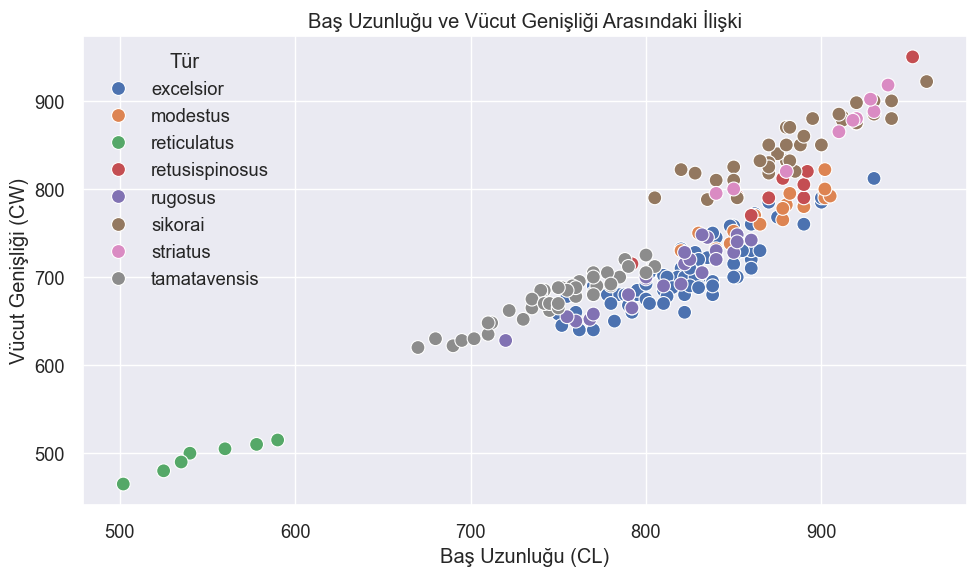

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CL', y='CW', data=df_cleaned, hue='species', s=100)
plt.title('Baş Uzunluğu ve Vücut Genişliği Arasındaki İlişki')
plt.xlabel('Baş Uzunluğu (CL)')
plt.ylabel('Vücut Genişliği (CW)')
plt.legend(title='Tür')
plt.tight_layout()
plt.show()

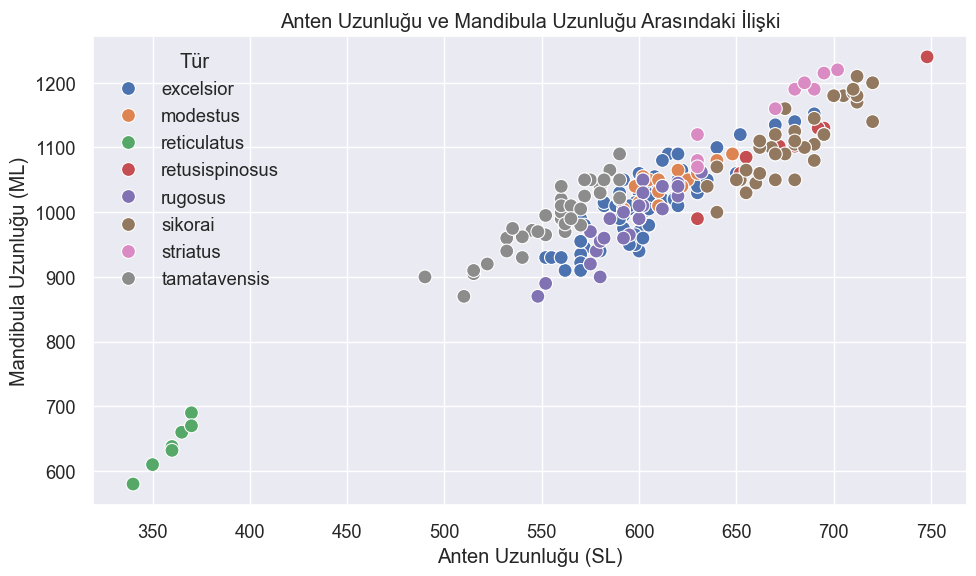

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SL', y='ML', data=df_cleaned, hue='species', s=100)
plt.title('Anten Uzunluğu ve Mandibula Uzunluğu Arasındaki İlişki')
plt.xlabel('Anten Uzunluğu (SL)')
plt.ylabel('Mandibula Uzunluğu (ML)')
plt.legend(title='Tür')
plt.tight_layout()
plt.show()

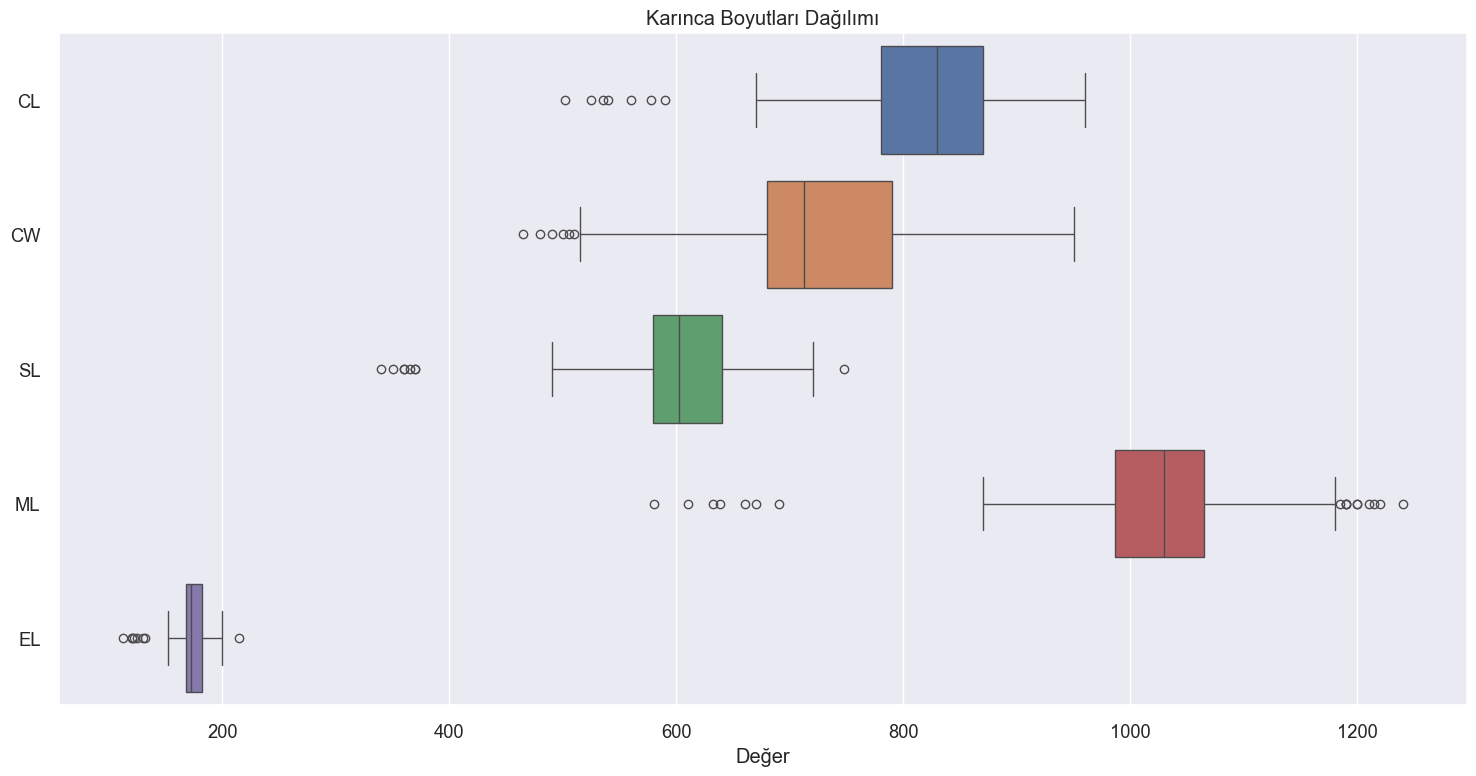

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned[['CL', 'CW', 'SL', 'ML', 'EL']], orient='h')
plt.title('Karınca Boyutları Dağılımı')
plt.xlabel('Değer')
plt.tight_layout()
plt.show()

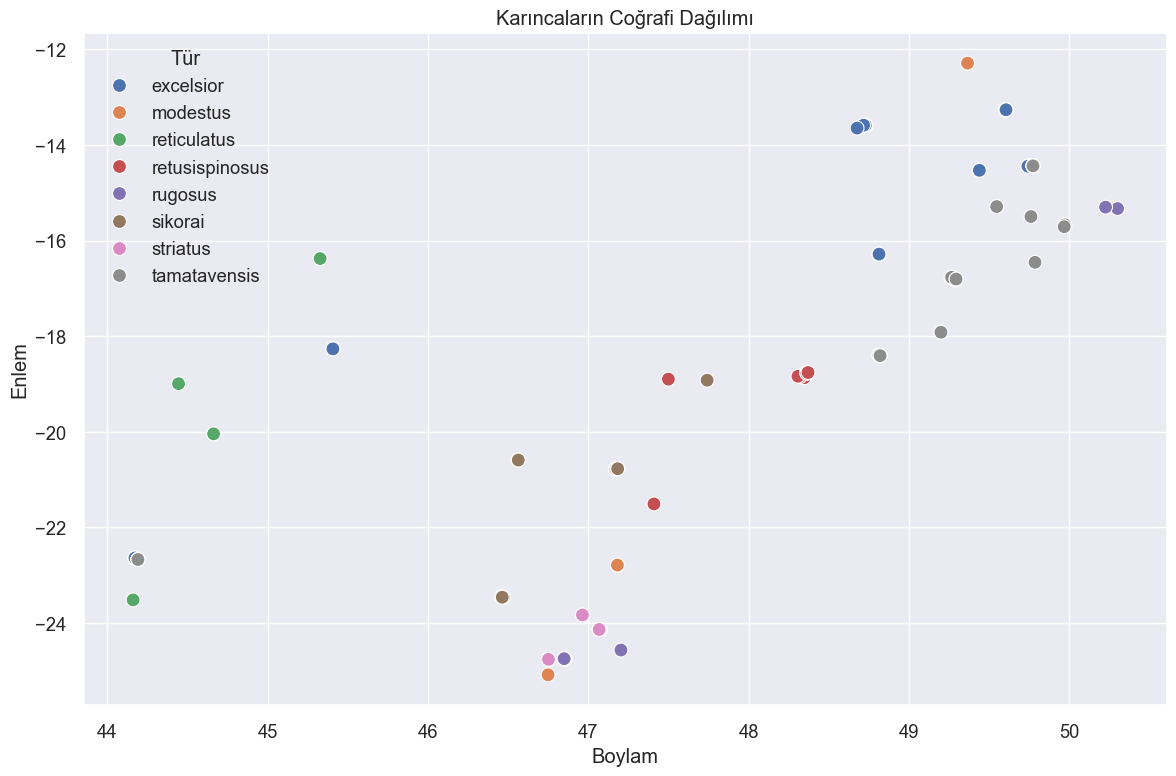

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df_cleaned, hue='species', s=100)
plt.title('Karıncaların Coğrafi Dağılımı')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.legend(title='Tür')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
features_to_scale = ['CL', 'CW', 'CWb', 'FRS', 'SL', 'EL', 'MW', 'PSTI', 'PEW', 
                    'PPW', 'SPBA', 'SPTI', 'ML', 'PEL', 'NOL', 'MPST', 'PEH', 
                    'NOH', 'PPH', 'SPST', 'PPL']


In [31]:
X = df_cleaned[features_to_scale]
y = df_cleaned['CS_µm']  # Hedef değişken olarak karınca boyutunu seçtik

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)


In [34]:
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

In [35]:
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

In [36]:
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0, 0.5, 'CW')

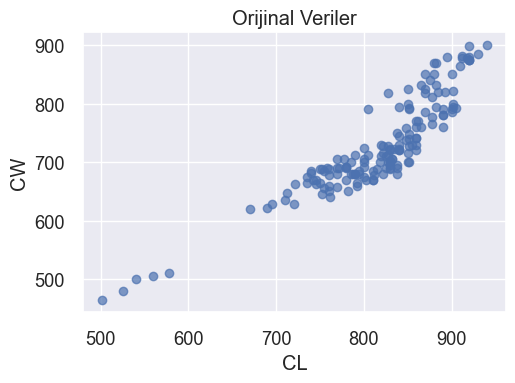

In [37]:
plt.subplot(2, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.7)
plt.title('Orijinal Veriler')
plt.xlabel(features_to_scale[0])
plt.ylabel(features_to_scale[1])

Text(0, 0.5, 'CW (Standartlaştırılmış)')

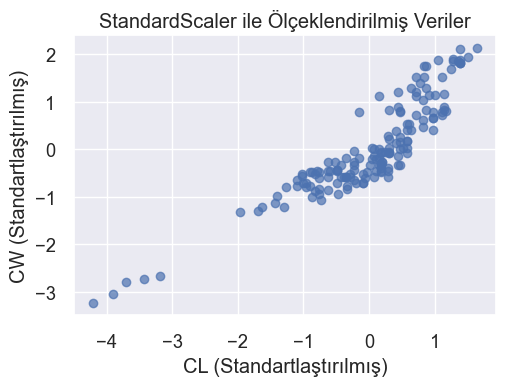

In [38]:
plt.subplot(2, 2, 2)
plt.scatter(X_train_standard[:, 0], X_train_standard[:, 1], alpha=0.7)
plt.title('StandardScaler ile Ölçeklendirilmiş Veriler')
plt.xlabel(f'{features_to_scale[0]} (Standartlaştırılmış)')
plt.ylabel(f'{features_to_scale[1]} (Standartlaştırılmış)')

Text(0, 0.5, 'CW (Min-Max)')

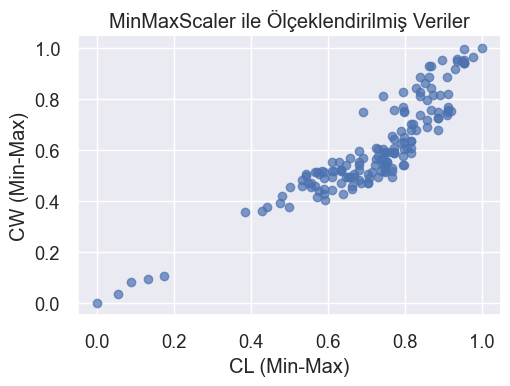

In [39]:
plt.subplot(2, 2, 3)
plt.scatter(X_train_minmax[:, 0], X_train_minmax[:, 1], alpha=0.7)
plt.title('MinMaxScaler ile Ölçeklendirilmiş Veriler')
plt.xlabel(f'{features_to_scale[0]} (Min-Max)')
plt.ylabel(f'{features_to_scale[1]} (Min-Max)')

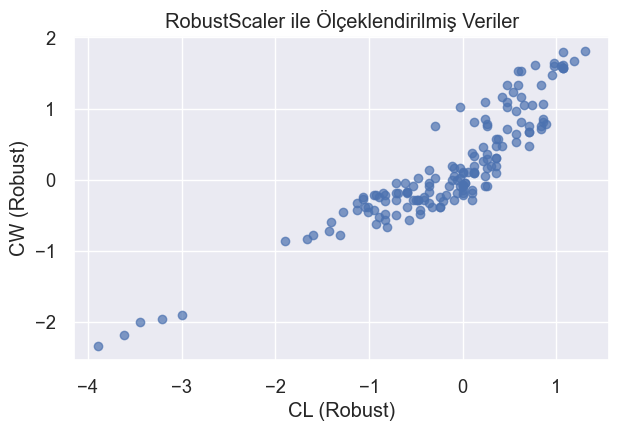

In [40]:
plt.subplot(2, 2, 4)
plt.scatter(X_train_robust[:, 0], X_train_robust[:, 1], alpha=0.7)
plt.title('RobustScaler ile Ölçeklendirilmiş Veriler')
plt.xlabel(f'{features_to_scale[0]} (Robust)')
plt.ylabel(f'{features_to_scale[1]} (Robust)')

plt.tight_layout()
plt.show()


In [41]:
X_train_scaled = X_train_standard
X_test_scaled = X_test_standard

In [42]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

Linear Regression Çapraz Doğrulama R² Skoru: 1.0000 ± 0.0000
Ridge Regression Çapraz Doğrulama R² Skoru: 0.9991 ± 0.0003
Lasso Regression Çapraz Doğrulama R² Skoru: 0.9997 ± 0.0001
Random Forest Çapraz Doğrulama R² Skoru: 0.9884 ± 0.0050
SVR Çapraz Doğrulama R² Skoru: 0.2269 ± 0.0924


C:\Users\Hamancab\AppData\Local\Temp\ipykernel_14292\1831242224.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([results[name] for name in models.keys()], patch_artist=True, labels=models.keys())


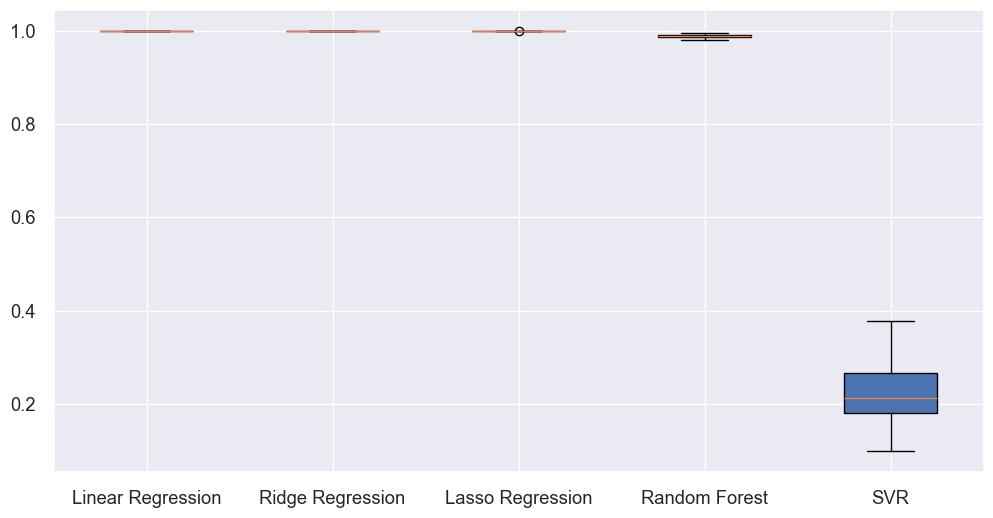

In [43]:
results = {}

for name, model in models.items():
    # 5-katlı çapraz doğrulama yapacağız
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    results[name] = cv_scores
    print(f"{name} Çapraz Doğrulama R² Skoru: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Sonuçları görselleştirelim
plt.figure(figsize=(12, 6))
box = plt.boxplot([results[name] for name in models.keys()], patch_artist=True, labels=models.keys())

In [44]:
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

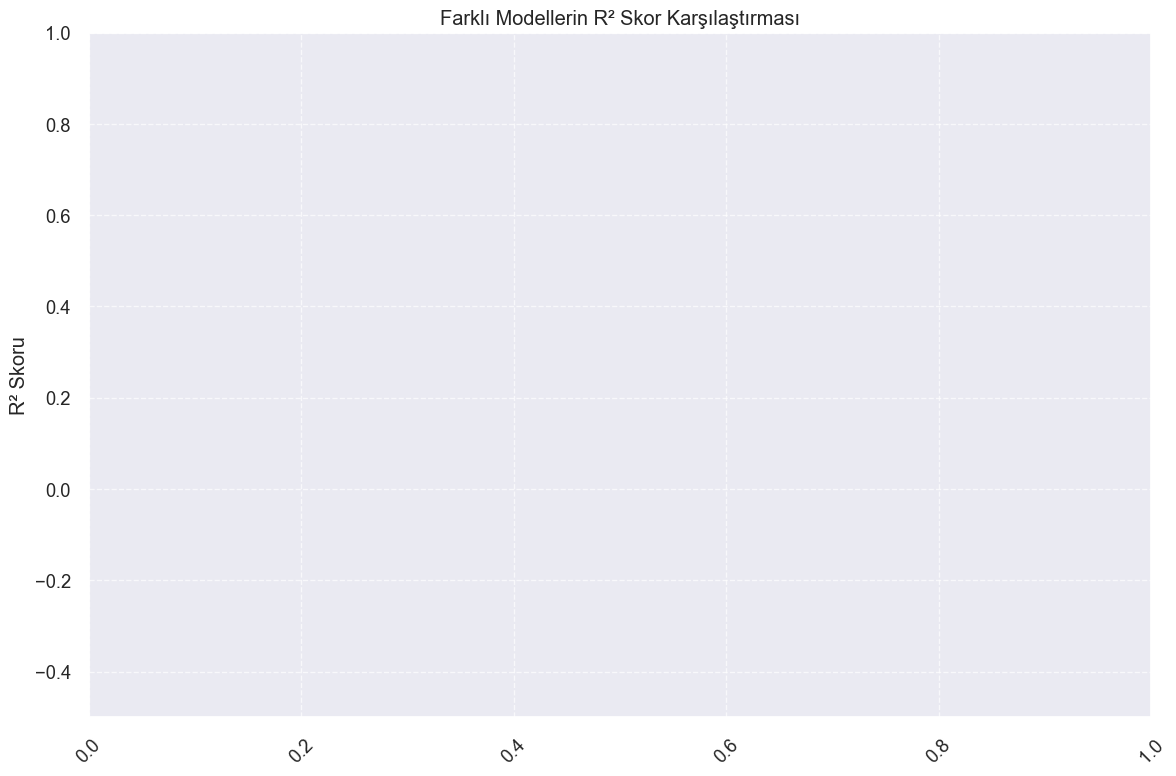

In [45]:
plt.title('Farklı Modellerin R² Skor Karşılaştırması')
plt.ylabel('R² Skoru')
plt.ylim(-0.5, 1.0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
rf_model = RandomForestRegressor(random_state=42)

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Random Forest için en iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
En iyi çapraz doğrulama R² skoru: 0.9892

Test seti üzerinde performans:
Ortalama Kare Hata (MSE): 95.2646
R² Skoru: 0.9827


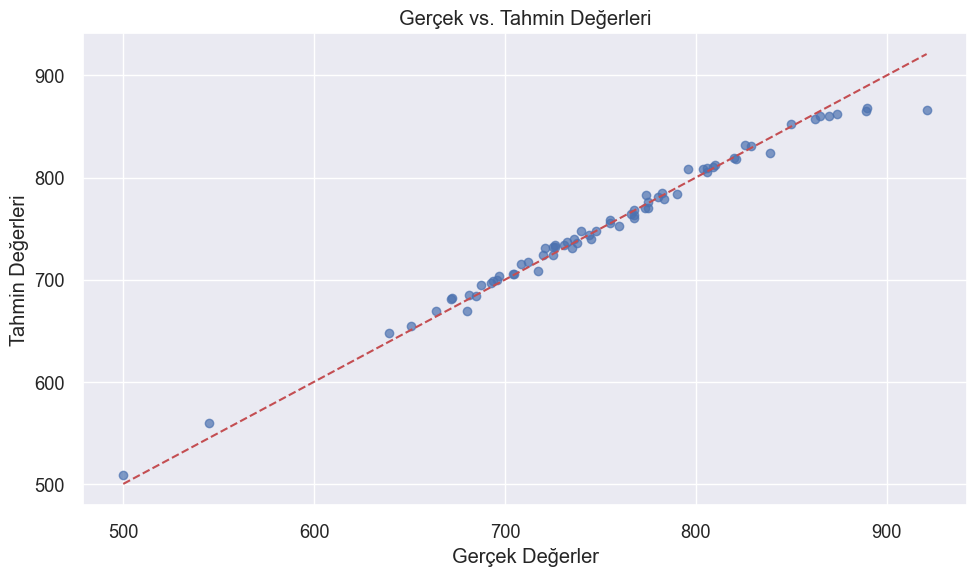

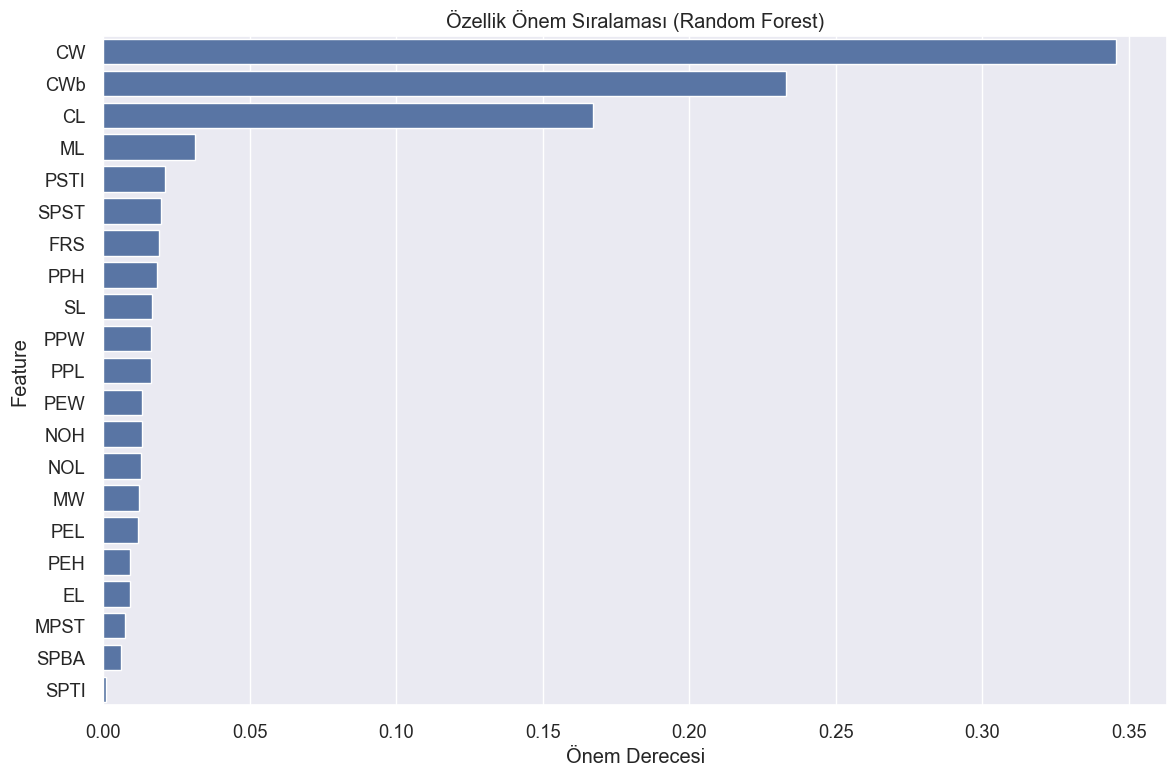


---- SONUÇLAR VE BULGULAR ----

Bu analiz, karınca morfolojik verilerini kullanarak aşağıdaki sonuçlara ulaşmıştır:

1. EDA Sonuçları:
   - Veri setimizde çeşitli karınca türleri ve onların morfolojik ölçümleri bulunmaktadır.
   - Özellikler arasında güçlü korelasyonlar mevcut, özellikle vücut ölçümleri arasında.
   - Coğrafi dağılım analizi, belirli türlerin belirli coğrafi bölgelerde yoğunlaştığını göstermektedir.

2. Özellik Ölçeklendirme:
   - Farklı ölçeklendirme yöntemleri verileri farklı şekillerde etkiler.
   - StandardScaler, karınca morfolojik verilerimiz için en uygun ölçeklendirme yöntemi olarak belirlenmiştir.

3. Model Performansı:
   - Random Forest modeli en iyi performansı göstermiştir.
   - Optimize edilmiş Random Forest modeli yüksek R² değeri ile başarılı tahminler yapabilmektedir.
   - En önemli özellikler belirlenerek, karınca boyutlarını etkileyen temel faktörler ortaya çıkarılmıştır.


Sonuç olarak, bu analiz karınca morfometrisinde makine öğrenmesi modellerini

In [48]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                          cv=5, n_jobs=-1, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreler ve skoru
print(f"\nRandom Forest için en iyi parametreler: {grid_search.best_params_}")
print(f"En iyi çapraz doğrulama R² skoru: {grid_search.best_score_:.4f}")

# En iyi model ile test setinde performansı değerlendirelim
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

# Test seti performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest seti üzerinde performans:")
print(f"Ortalama Kare Hata (MSE): {mse:.4f}")
print(f"R² Skoru: {r2:.4f}")

# Tahminleri görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gerçek vs. Tahmin Değerleri')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.tight_layout()
plt.show()

# Özellik önemliliklerini görselleştirelim
if hasattr(best_rf_model, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    feature_importance = pd.DataFrame({
        'Feature': features_to_scale,
        'Importance': best_rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Özellik Önem Sıralaması (Random Forest)')
    plt.xlabel('Önem Derecesi')
    plt.tight_layout()
    plt.show()

# ---- SONUÇLAR VE BULGULAR ----
print("\n---- SONUÇLAR VE BULGULAR ----")
print("""
Bu analiz, karınca morfolojik verilerini kullanarak aşağıdaki sonuçlara ulaşmıştır:

1. EDA Sonuçları:
   - Veri setimizde çeşitli karınca türleri ve onların morfolojik ölçümleri bulunmaktadır.
   - Özellikler arasında güçlü korelasyonlar mevcut, özellikle vücut ölçümleri arasında.
   - Coğrafi dağılım analizi, belirli türlerin belirli coğrafi bölgelerde yoğunlaştığını göstermektedir.

2. Özellik Ölçeklendirme:
   - Farklı ölçeklendirme yöntemleri verileri farklı şekillerde etkiler.
   - StandardScaler, karınca morfolojik verilerimiz için en uygun ölçeklendirme yöntemi olarak belirlenmiştir.

3. Model Performansı:
   - Random Forest modeli en iyi performansı göstermiştir.
   - Optimize edilmiş Random Forest modeli yüksek R² değeri ile başarılı tahminler yapabilmektedir.
   - En önemli özellikler belirlenerek, karınca boyutlarını etkileyen temel faktörler ortaya çıkarılmıştır.
""")

# Sonuç olarak:
print("""
Sonuç olarak, bu analiz karınca morfometrisinde makine öğrenmesi modellerinin etkili bir şekilde kullanılabileceğini göstermiştir. 
Random Forest algoritması, karınca boyutlarını tahmin etmek için en etkili model olarak belirlenmiştir.
Bu tür analizler, biyolojik çeşitlilik araştırmalarında, türleri sınıflandırmada ve morfolojik özellikler arasındaki karmaşık ilişkileri anlamada yardımcı olabilir.
""")

